# Importando bibliotecas
 - Setando o estilo dos gráficos
 - Lendo o arquivo excel (xlsx)

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
plt.style.use('seaborn')

In [ ]:
#from google.colab import files
#arq = files.upload()

In [ ]:
df = pd.read_excel(r'/content/drive/MyDrive/Colab/Cusro_Python_Pandas_Digital_Innovation-master/datasets/AdventureWorks.xlsx')

In [ ]:
df.shape

(904, 16)

In [ ]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

# Criando novas colunas
 - Valor de venda
 - Custo total
 - Lucro


In [ ]:
df['Valor Venda'].sum()

5984606.1426

In [ ]:
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
round(df['Custo'].sum(), 2)

2486783.05

In [ ]:
df['Lucro'] = df['Valor Venda'] - df['Custo']
round(df['Lucro'].sum(), 2)

3497823.09

# Cálculo de tempo de envio
 - Tempo médio
 - Valores Nulos (NaN, Null)

In [ ]:
df['Tempo_Envio'] = df['Data Envio'] - df['Data Venda']
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [ ]:
df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [ ]:
df.head(1)
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
Custo                    float64
Lucro                    float64
Tempo_Envio                int64
dtype: object

In [ ]:
df.groupby("Marca")['Tempo_Envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio, dtype: float64

In [ ]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

# Cálculo de Lucro por ano e por marca
 - Format
 - Index
 - Total de produtos vendidos

In [ ]:
df.groupby([df['Data Venda'].dt.year, "Marca"])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
df.groupby("Produto")['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

# Gerando gráficos com matpolotlib

Text(0, 0.5, 'Produto')

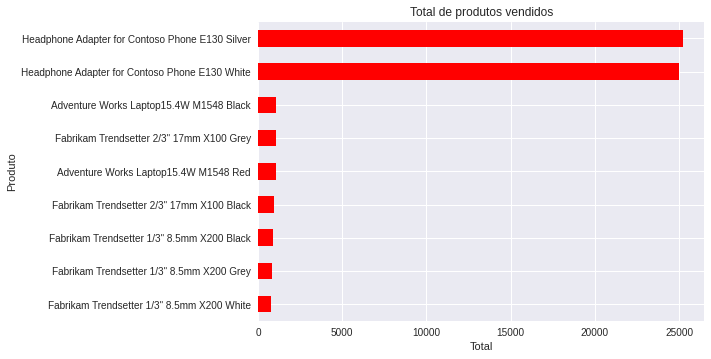

In [66]:
plt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
df.groupby("Produto")['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Total de produtos vendidos');
plt.xlabel("Total")
plt.ylabel("Produto")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

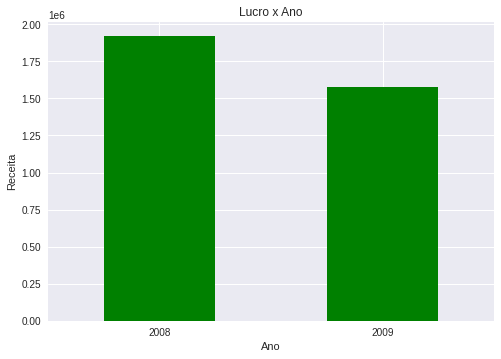

In [83]:
df.groupby(df["Data Venda"].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano', color="green");
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.xticks(rotation='horizontal')

In [ ]:
df.groupby(df["Data Venda"].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

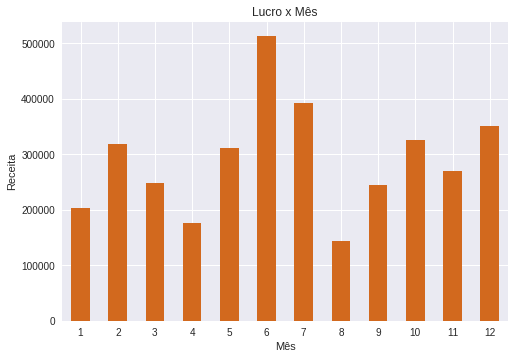

In [86]:
df.groupby(df["Data Venda"].dt.month)['Lucro'].sum().plot.bar(title='Lucro x Mês', color='chocolate');
plt.xlabel("Mês")
plt.ylabel("Receita")
plt.xticks(rotation='horizontal')

 - Vendas de 2009

In [ ]:
df_2009 = df[df['Data Venda'].dt.year == 2009]

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

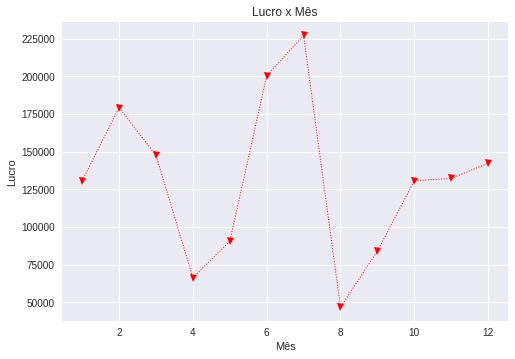

In [76]:
plt.rc('lines', linewidth=1, linestyle=':')
df_2009.groupby(df_2009["Data Venda"].dt.month)['Lucro'].sum().plot(title='Lucro x Mês', marker='v');
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

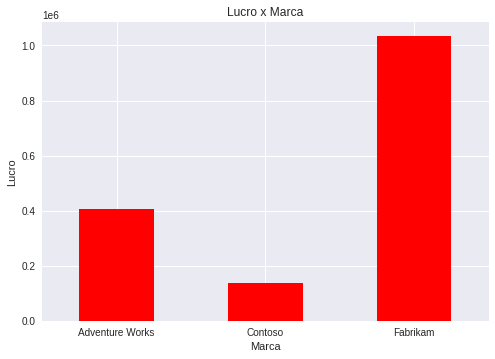

In [77]:
df_2009.groupby("Marca")['Lucro'].sum().plot.bar(title='Lucro x Marca');
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

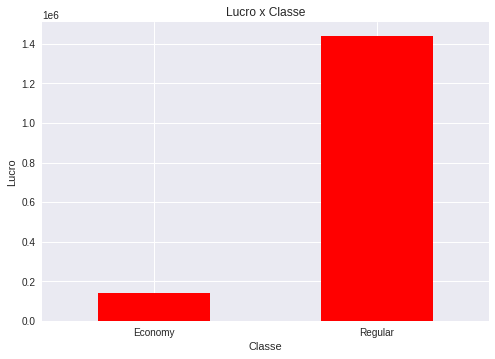

In [78]:
df_2009.groupby("Classe")['Lucro'].sum().plot.bar(title='Lucro x Classe');
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal')

# Funções do matplotlib e pandas

In [ ]:
df['Tempo_Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

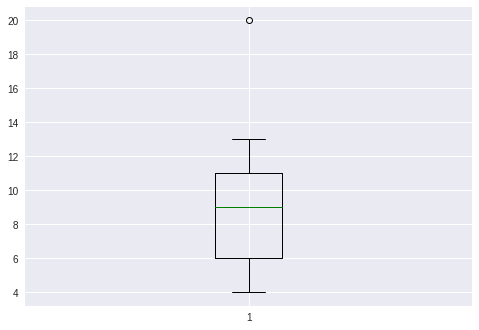

In [79]:
plt.boxplot(df['Tempo_Envio']);

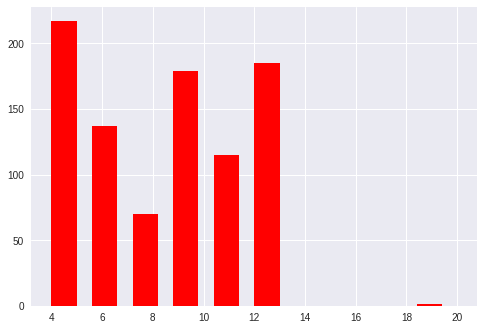

In [82]:
plt.hist(df['Tempo_Envio'], width=1);

In [ ]:
df['Tempo_Envio'].min()

4

In [ ]:
df['Tempo_Envio'].max()

20

In [ ]:
df[df['Tempo_Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
